TP réalisé par :

**WELEHELA TAWEUTEU ORCHELLE PATRICIA**
**NDIAYE BASSIROU SERIGNE**

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("maulanaakbardwijaya/animal-sounds-dataset")

print("Path to dataset files:", path)

100%|█████████████████████████████████████████████████████████████████████████████| 10.3M/10.3M [00:03<00:00, 3.53MB/s]

Extracting files...


Path to dataset files: C:\Users\patricia\.cache\kagglehub\datasets\maulanaakbardwijaya\animal-sounds-dataset\versions\1


## **Étape 2 : Lister les fichiers audio du dataset**

Afficher tous les fichiers .wav ou .ogg présents dans le dossier du dataset.

In [ ]:
import os

print("Chemin du dataset :", path)
print("Contenu du dossier :")
print(os.listdir(path))


Chemin du dataset : C:\Users\patricia\.cache\kagglehub\datasets\maulanaakbardwijaya\animal-sounds-dataset\versions\1
Contenu du dossier :
['Data Train', 'DataTest']


In [ ]:
audio_files = []

# Parcours récursif du dossier
for root, dirs, files in os.walk(path):
    for file in files:
        if file.endswith('.wav') or file.endswith('.ogg'):
            full_path = os.path.join(root, file)
            audio_files.append(full_path)

# Affichage
print("Fichiers audio trouvés :")
for i, file in enumerate(audio_files):
    print(f"{i+1}. {file}")


Fichiers audio trouvés :
1. C:\Users\patricia\.cache\kagglehub\datasets\maulanaakbardwijaya\animal-sounds-dataset\versions\1\Data Train\cat\cat1.wav
2. C:\Users\patricia\.cache\kagglehub\datasets\maulanaakbardwijaya\animal-sounds-dataset\versions\1\Data Train\cat\cat2.wav
3. C:\Users\patricia\.cache\kagglehub\datasets\maulanaakbardwijaya\animal-sounds-dataset\versions\1\Data Train\dog\dog-bark3.wav
4. C:\Users\patricia\.cache\kagglehub\datasets\maulanaakbardwijaya\animal-sounds-dataset\versions\1\Data Train\dog\dog1.wav
5. C:\Users\patricia\.cache\kagglehub\datasets\maulanaakbardwijaya\animal-sounds-dataset\versions\1\Data Train\dog\dog2.wav
6. C:\Users\patricia\.cache\kagglehub\datasets\maulanaakbardwijaya\animal-sounds-dataset\versions\1\Data Train\dog\dog_bark2.wav
7. C:\Users\patricia\.cache\kagglehub\datasets\maulanaakbardwijaya\animal-sounds-dataset\versions\1\Data Train\duck\duck1.wav
8. C:\Users\patricia\.cache\kagglehub\datasets\maulanaakbardwijaya\animal-sounds-dataset\versio

## **Étape 3 : Charger un fichier audio avec Librosa et afficher sa taille et durée**

In [ ]:
!pip install librosa

   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   ---------------------------------------- 1.0/1.0 MB 6.5 MB/s eta 0:00:00

   -------------------------- ------------- 6/9 [soundfile]
   ----------------------------------- ---- 8/9 [librosa]
   ----------------------------------- ---- 8/9 [librosa]
   ---------------------------------------- 9/9 [librosa]



In [ ]:
import librosa

# Choisir le premier fichier audio trouvé
audio_file = audio_files[0]  # ou audio_files[n] pour un autre fichier

# Charger le fichier audio
y, sr = librosa.load(audio_file, sr=None)

# Afficher les infos du signal
print(f"Fichier chargé : {audio_file}")
print(f"Durée : {len(y)/sr:.2f} secondes")
print(f"Fréquence d'échantillonnage : {sr} Hz")
print(f"Type de signal : {type(y)}")
print(f"Taille du signal : {len(y)} échantillons")


Fichier chargé : C:\Users\patricia\.cache\kagglehub\datasets\maulanaakbardwijaya\animal-sounds-dataset\versions\1\Data Train\cat\cat1.wav
Durée : 5.12 secondes
Fréquence d'échantillonnage : 44100 Hz
Type de signal : <class 'numpy.ndarray'>
Taille du signal : 225792 échantillons


librosa.load(...) lit le fichier audio et retourne :

y : tableau NumPy contenant les amplitudes du signal audio.

sr : fréquence d’échantillonnage (sampling rate).

sr=None : conserve la fréquence d’origine du fichier.

Librosa convertit automatiquement le signal en mono.

## **Étape 4 : Afficher le waveform (forme d’onde) avec librosa et matplotlib**

Tracer la forme d’onde du signal audio pour observer ses variations d’amplitude dans le temps.

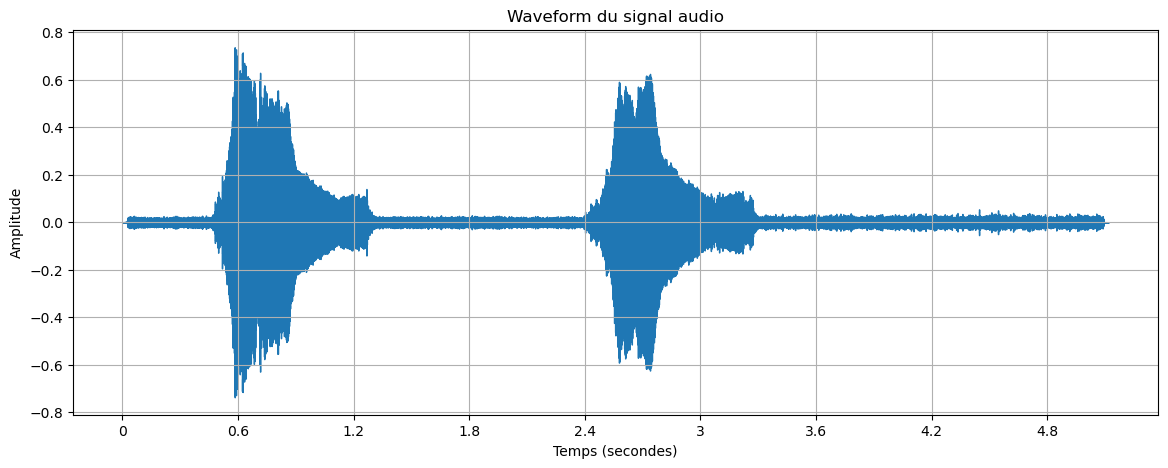

In [ ]:
import librosa.display
import matplotlib.pyplot as plt

# Charger le fichier audio (si ce n’est pas déjà fait)
y, sr = librosa.load(audio_file, sr=None)

# Tracer le waveform
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr)
plt.title("Waveform du signal audio")
plt.xlabel("Temps (secondes)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()


librosa.display.waveshow(...) : trace la forme d’onde du signal audio.

y : tableau des amplitudes du signal.

sr : fréquence d’échantillonnage, utilisée pour convertir les échantillons en secondes.

plt.figure(figsize=(14, 5)) : définit la taille du graphique.

plt.grid(True) : ajoute une grille pour faciliter la lecture.

## **Étape 5 : Calculer et afficher le spectrogramme avec librosa**

Visualiser comment les fréquences du signal audio évoluent dans le temps.

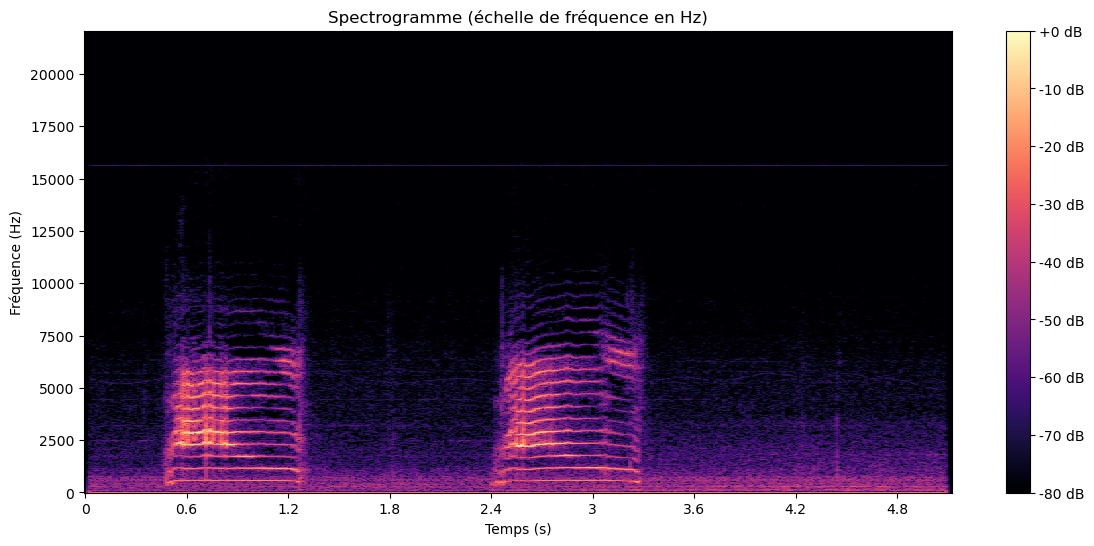

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Charger le fichier audio
y, sr = librosa.load(audio_file, sr=None)

# Calculer le spectrogramme (transformée de Fourier à court terme)
S = librosa.stft(y)  # STFT = Short-Time Fourier Transform
S_db = librosa.amplitude_to_db(np.abs(S), ref=np.max)  # Convertir en décibels

# Afficher le spectrogramme
plt.figure(figsize=(14, 6))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='hz', cmap='magma')
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogramme (échelle de fréquence en Hz)")
plt.xlabel("Temps (s)")
plt.ylabel("Fréquence (Hz)")
plt.show()


**librosa.stft(y)** : calcule la transformée de Fourier à court terme (STFT), qui décompose le signal en fréquences.

np.abs(S) : module des coefficients complexes.

librosa.amplitude_to_db(...) : conversion en décibels pour une meilleure lisibilité.

specshow(...) : affiche le spectrogramme avec les axes temps et fréquence.

cmap='magma' : palette de couleurs (tu peux essayer 'viridis', 'plasma', etc.).

## **Étape 6 : Jouer le son dans Jupyter avec IPython.display.Audio**

Permettre d’écouter le fichier audio directement dans le notebook.

In [ ]:
from IPython.display import Audio

# Jouer le fichier audio
Audio(filename=audio_file)
# Audio(filename=...) : crée un lecteur audio intégré dans le notebook.